## Imports

In [1]:
%pip install pandas scikit-learn tensorflow keras tqdm numpy matplotlib pydot IPython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

import pydot
from IPython.display import Image

import time
import os

2023-04-06 18:48:27.558708: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-06 18:48:27.644247: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-06 18:48:27.645324: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 18:48:28.671364: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# print available GPUs
print("Num GPUs Available: ", tf.config.experimental.list_physical_devices('GPU'))

Num GPUs Available:  []


## Clean Data

In [4]:
if not os.path.exists("clean_train.csv"):
    import csv

    def to_int(s):
        try:
            return int(s)
        except:
            int_str = ""
            for i in range(len(str(s))):
                if str(s)[i] in "0123456789.":
                    int_str += str(s)[i]
            if int_str == "":
                return 0
            elif int_str.count(".") > 1:
                return int(int_str.replace(".", ""))
            else:
                return int(float(int_str))

    input_file = open("train.csv", "r")

    output_csv_array = []

    for row in csv.reader(input_file):
        
        output_row = []
        
        for i in range(len(row)):
            if row[0] == "PassengerId":
                print("header")
                if i in [0,1,2,4,5,6,7,8,9,11]:
                    output_row.append(row[i])
                
            
            elif i in [0,1,2,5,6,7,9]:
                try:
                    output_row.append(to_int(row[i]))
                except:
                    print("Error: ", row[i])
            
            elif i == 4:
                output_row.append(0 if row[i] == "male" else 1)
            
            elif i == 8:
                output_row.append(to_int(row[i]))
                
            elif i == 11:
                output_row.append(0 if row[i] == "S" else 1 if row[i] == "C" else 2)
        
        output_csv_array.append(output_row)

    with open("clean_train.csv", "w", newline="") as output_file:
        writer = csv.writer(output_file)
        writer.writerows(output_csv_array)

    input_file.close()

else:
    print("clean_train.csv already exists")


clean_train.csv already exists


## import data

In [5]:
df = pd.read_csv("clean_train.csv")


X, y = df.iloc[:, 2:], df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,23.783389,0.523008,0.381594,2.846126e+05,31.785634,0.365881
std,257.353842,0.486592,0.836071,0.477990,17.597344,1.102743,0.806057,1.193290e+06,49.703730,0.640157
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,1.350800e+04,7.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,24.000000,0.000000,0.000000,1.113610e+05,14.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,3.470770e+05,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.310129e+07,512.000000,2.000000


## AI Model

In [15]:
def train_model(X_train, y_train, epochs = 100, batch_size=32, model_arg=None):
    if model_arg == None:
        model = Sequential()
        model.add(Dense(16, activation="relu", input_shape=(X_train.shape[1],)))
        model.add(Dense(32, activation="relu"))
        model.add(Dense(32, activation="relu"))
        model.add(Dense(32, activation="relu"))
        model.add(Dense(32, activation="relu"))
        model.add(Dense(32, activation="relu"))
        model.add(Dense(24, activation="relu"))
        model.add(Dense(16, activation="relu"))
        model.add(Dense(8, activation="relu"))
        model.add(Dense(4, activation="relu"))
        model.add(Dense(1, activation='tanh'))
        model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
        print(model.summary())
    else:
        model = model_arg
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
    return model

In [7]:
def plot_model_architecture(model):
    """Plot a Keras model's architecture and display it in the notebook."""
    plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
    return Image(filename='model.png')

## User Input

In [8]:
epochs = 128
batch_size = 8148

## Load Model

In [9]:
if os.path.exists("model.h5"):
    model = load_model("model.h5")
    print("model loaded")
else:
    model = None
    print("model not loaded")

print(model)

model not loaded
None


## Run Model

In [17]:
t1 = time.time()


model_trained = train_model(X_train, y_train, epochs=epochs, batch_size=batch_size, model_arg=None)

_, accuracy = model_trained.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

print("time:", str(int((time.time() - t1)*1000)) + "ms")

print("Accuracy: ", accuracy)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                144       
                                                                 
 dense_19 (Dense)            (None, 32)                544       
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dense_24 (Dense)            (None, 24)               

## visualize Model architecture

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


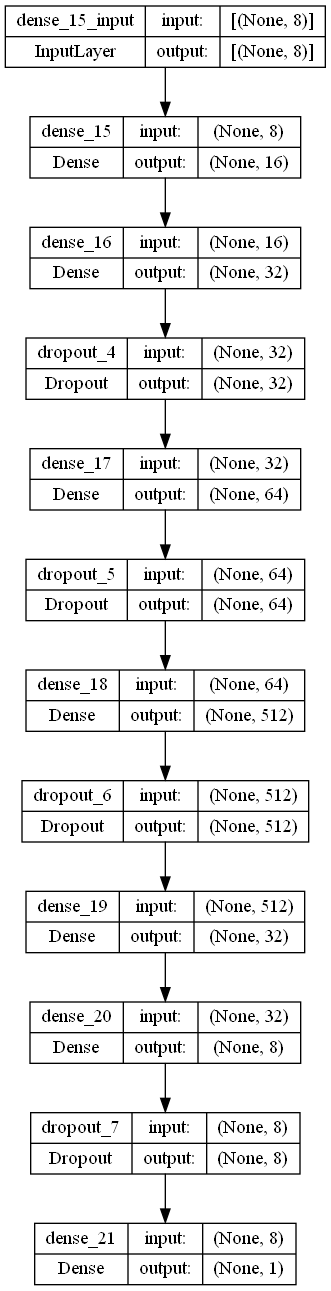

In [11]:
plot_model_architecture(model_trained)

In [12]:
model_trained.save("model.h5")